In [2]:
import numpy as np
import pandas as pd
import os
from random import randrange
from matplotlib import pyplot as plt
from PIL import Image
from sklearn.decomposition import PCA
from scipy import ndimage
from matplotlib import image as mpimg

The flowchart is avilable as "SMAI_assi_2_q4_1_Flowchart.png" file in "4_assi-2" folder.(in the notebook its not proper visible)

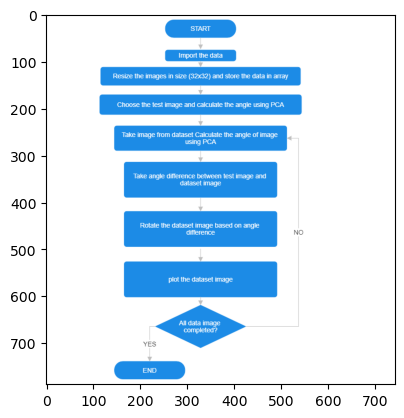

In [3]:
image = mpimg.imread("SMAI_assi_2_q4_1_Flowchart.png")
plt.imshow(image)
plt.show()
im = Image.open(r"SMAI_assi_2_q4_1_Flowchart.png")
im.show()

In [4]:
image_folder = "KIMIA dataset"
image_files = [os.path.join(image_folder, filename) for filename in os.listdir(image_folder) if filename.endswith('.png')]

In [5]:
image_data = []
for image_file in image_files:
    # Open the image
    image = Image.open(image_file)
    image = image.convert('L')
    #Inverting the image from (black, white) to (white, black)
    image = Image.eval(image, lambda x: 255 - x)  
    image = image.resize((32, 32))
    image_data.append(np.array(image))
    
image_array = np.array(image_data)
image_array.shape

(99, 32, 32)

In below code the inputs are sample_image(test image index in the data).

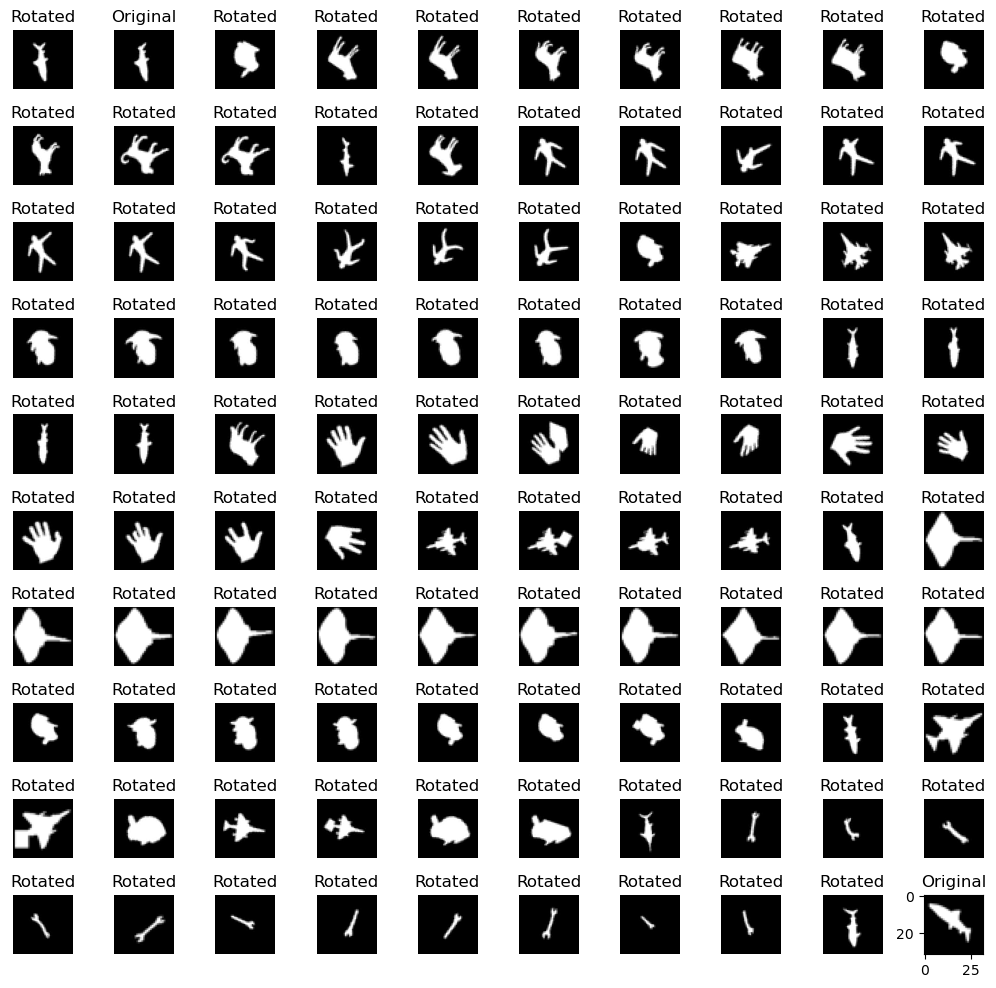

In [6]:
sample_image = 1
image_main = image_array[sample_image]
pca = PCA(n_components=2)
projected = pca.fit_transform(image_main)
angle = np.arctan2(pca.components_[0,1], pca.components_[0,0])
angle_main = np.degrees(angle)

f, ax = plt.subplots(10,10, figsize=(10,10))
plt.imshow(image_main,'gray')
plt.title('Original')
pca_n = PCA(n_components=2)
k_pre = 0
j = 0
for i in range(image_array.shape[0]):

    projected = pca_n.fit_transform(image_array[i])
    angle = np.arctan2(pca.components_[0,0], pca_n.components_[0,0])
    angle = np.degrees(angle)
    # rotate_angle = angle_main-angle
    rotated = ndimage.rotate(image_array[i], -angle)
    
    k = int(i/10)
    if k!=k_pre:
        j=0
    k_pre = k
    ax[k][j].imshow(rotated,'gray')
    ax[k][j].axis('off')
    if i == sample_image:
        ax[k][j].set_title('Original')
    else:
        ax[k][j].set_title('Rotated')
    j = j+1

plt.tight_layout()  # Adjust subplot spacing
plt.show()

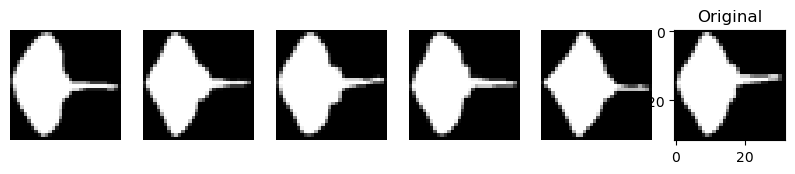

In [15]:
sample_image = 62
image_main = image_array[sample_image]
pca = PCA(n_components=2)
projected = pca.fit_transform(image_main)
angle = np.arctan2(pca.components_[0,1], pca.components_[0,0])
angle_main = np.degrees(angle)
f, ax = plt.subplots(1,6, figsize=(10,10))
plt.imshow(image_main,'gray')
plt.title('Original')
pca_n = PCA(n_components=2)
for i in range(5):
    projected = pca_n.fit_transform(image_array[sample_image+i+1])
    angle = np.arctan2(pca.components_[0,1], pca.components_[0,0])
    angle = np.degrees(angle)
    rotate_angle = angle_main-angle
    rotated = ndimage.rotate(image_array[sample_image+i+1], -rotate_angle)
    ax[i].imshow(rotated,'gray')
    ax[i].axis('off')

AttributeError: 'numpy.ndarray' object has no attribute 'imshow'